In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


In [6]:

dat_BLYP = dict()

counter = 1

dir = './low_pressures/'
for i in range(0,6):
    x_range = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_rdf_2.5.dat')[:,0]
    rdf_1 = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_rdf_2.5.dat')[:,1]
    #tot = rdf_1
    rdf_2 = np.loadtxt(dir + str(i) + '/outputs_v2/surf_co2_rdf_2.5.dat')[:,1]
    tot = [(rdf_1[i] + rdf_2[i])/2 for i in range(len(rdf_1))]
    dat_BLYP[counter] = [x_range, tot]
    counter += 1
dir = './intermediate_pressures/'
for i in range(0,6):
    x_range = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_rdf_2.5.dat')[:,0]
    rdf_1 = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_rdf_2.5.dat')[:,1]
    #tot = rdf_1
    rdf_2 = np.loadtxt(dir + str(i) + '/outputs_v2/surf_co2_rdf_2.5.dat')[:,1]
    tot = [(rdf_1[i] + rdf_2[i])/2 for i in range(len(rdf_1))]
    dat_BLYP[counter] = [x_range, tot]
    counter += 1
dir = './high_pressures/'
for i in range(0,6):
    x_range = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_rdf_2.5.dat')[:,0]
    rdf_1 = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_rdf_2.5.dat')[:,1]
    #tot = rdf_1
    rdf_2 = np.loadtxt(dir + str(i) + '/outputs_v2/surf_co2_rdf_2.5.dat')[:,1]
    tot = [(rdf_1[i] + rdf_2[i])/2 for i in range(len(rdf_1))]
    dat_BLYP[counter] = [x_range, tot]
    counter += 1

avg_out = []
err_out = []
for i in range(len(dat_BLYP[1][0])):
    out = []
    for j in range(4,18):
        out.append(np.mean(dat_BLYP[j][1][i]))
    avg_out.append(np.average(out))
    err_out.append(np.std(out))

pressures = [1, 5, 10, 20, 30, 40, 60, 65, 70, 75, 80, 85, 85, 100, 200, 300, 400, 500]
pressures_res = [5, 10, 20, 30, 40, 65, 70, 75, 80, 85, 100, 200, 300, 400, 500]


In [4]:
bulk_data = np.loadtxt('./VALIDATION/rdf.dat')
bulk_x = bulk_data[:,0]
bulk_y = bulk_data[:,1]

end_val = bulk_y[-1]
ref_end = dat_BLYP[15][1][-1]

bulk_y = [(i/end_val)*ref_end for i in bulk_y]

# Full plot

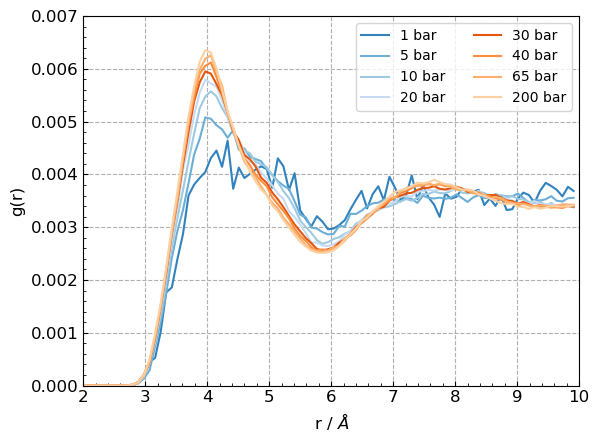

In [10]:
# color 
import seaborn as sns
sns.set_palette("tab20c",8)

no_files = 19
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)
c1='purple'
c2='darkgreen'
n = no_files - 1


fig,ax = plt.subplots()
# ----------------- PLOT -----------------
#ax.plot(bulk_x, bulk_y, label='Bulk', color='black', ls='--')

for i in range(1,19):
    if i in [1,2,3,4,5,6,8,15]:
        ax.plot(dat_BLYP[i][0], dat_BLYP[i][1], label=str(pressures[i-1]) + ' bar')

ax.set_xlabel('r / $\AA$',size=12)
ax.set_ylabel('g(r)',size=12)
ax.tick_params(axis="x", which='both', direction="in", labelsize=12)
ax.tick_params(axis="y", which='both', direction="in", labelsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlim(2, 10)
ax.set_ylim(0, 0.007)


ax.grid(ls='--')
ax.legend(loc='upper right',ncol=2)
plt.savefig('./RESULTS/FIGURE_4_res.png',dpi=400,bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()